# Import necessary libraries and Datasets

Dataset link : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
airbnb=pd.read_csv("/content/drive/MyDrive/AB_NYC_2019.csv")

In [ ]:
df_copy=airbnb.copy(deep=True)

# Data Exploration and Cleaning

In [ ]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [ ]:
df_copy.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_copy.shape

(48895, 16)

# 1.Handling Incorrect datatypes if any

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#since newyork city has only 5 boroughs we can use category as the data type of the col
df_copy['neighbourhood_group']=pd.Categorical(df_copy['neighbourhood_group'])

In [ ]:
# Convert 'date_column' to datetime with custom format
df_copy['last_review'] = pd.to_datetime(df_copy['last_review'] , format='%d-%m-%Y')

In [ ]:
df_copy['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [ ]:
#since airbnb has 3 types of rooms we can use category as the data type of the col
df_copy['room_type']=pd.Categorical(df_copy['room_type'])

# 2.Handling Inconsistent data if any

In [ ]:
df_copy['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [ ]:
df_copy['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

# 3.Handling Missing Values if any

In [ ]:
df_copy.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
print(df_copy[df_copy.duplicated('id')])
#since the id is not duplicated so it is difficult to find the values of name column and it's a fact we can't impute them either with our knowledge so lets leave them as null values.

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [ ]:
host_id_duplicated = df_copy[df_copy.duplicated('host_id')]
print(host_id_duplicated.isna().sum())

id                                   0
name                                 0
host_id                              0
host_name                            3
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2659
reviews_per_month                 2659
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [ ]:
ind=list(host_id_duplicated[pd.isna(host_id_duplicated['host_name'])].index)
print(ind)
print(host_id_duplicated[pd.isna(host_id_duplicated['host_name'])].head())

[8852, 28042, 28274]
             id                                               name    host_id  \
8852    6786181                       R&S Modern Spacious Hideaway   32722063   
28042  21901156  Best Deal! Lovely place in Manhattan! Time Squ...  159156636   
28274  21990808                 ***SLEEPING IN THE GOLDEN PLACE***  159156636   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
8852        NaN            Brooklyn   East Flatbush  40.64345  -73.93643   
28042       NaN           Manhattan  Hell's Kitchen  40.75656  -73.99063   
28274       NaN           Manhattan  Hell's Kitchen  40.75835  -73.99065   

             room_type  price  minimum_nights  number_of_reviews last_review  \
8852   Entire home/apt    100               2                157  2019-06-19   
28042     Private room    120               1                109  2019-01-01   
28274     Private room    120               1                 88  2018-12-14   

       reviews_per_month  ca

In [ ]:
a = 1
for i in ind:
    try:
        # Update 'host_name' with 'unknown' and counter value
        df_copy.loc[i, 'host_name'] = "unknown" + str(a)

        # Iterate over host_id column indices
        for j in range(len(df_copy['host_id'])):
            # Check if host_id matches and indices are not equal
            if  df_copy['host_id'].iloc[i] == df_copy['host_id'].iloc[j]:
                # Assign host_name of i to j
                df_copy.loc[j, 'host_name'] = df_copy.loc[i, 'host_name']

        # Increment counter
        a += 1

    except KeyError as e:
        # Handle KeyError by printing error message and continuing execution
        print(f"KeyError occurred: {e}")
        continue


In [ ]:
df_copy[df_copy['host_name']=='unknown1'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8163,6292866,Modern Quiet Gem Near All,32722063,unknown1,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8852,6786181,R&S Modern Spacious Hideaway,32722063,unknown1,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342


In [ ]:
unknown_count=a
def replace_null(row):
    global unknown_count
    if pd.isnull(row['host_name']):
        unknown_count += 1
        return f"unknown{unknown_count - 1}"
    else:
        return row['host_name']

df_copy['host_name'] = df_copy.apply(replace_null, axis=1)

In [ ]:
df_copy.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Filtering rows with NaN values in both 'last_review' and 'reviews_per_month' columns
nan_reviews = df_copy[pd.isna(df_copy['last_review']) & pd.isna(df_copy['reviews_per_month'])]
len(nan_reviews)

10052

In [ ]:
print(len(df_copy[df_copy.number_of_reviews==0]))
print(len(df_copy[(df_copy.number_of_reviews==0)&pd.isna(df_copy['last_review']) & pd.isna(df_copy['reviews_per_month'])]))

10052
10052


since the number of reviews is zero the last review and reviews per month feature are empty.

# 4.Handling Invalid data if any

In [ ]:
df_copy[df_copy.calculated_host_listings_count<=0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
df_copy = df_copy[(df_copy['longitude'] >= -74.25570) & (df_copy['longitude'] <= -73.70040) &
                  (df_copy['latitude'] >= 40.49600) & (df_copy['latitude'] <= 40.91530)]
#there is no null values,its range is within rangelist of newyork city latitude
#and longitude so it the columns longitude and latitude have consistent and reliable data
#the data type of the longitude and latitude is also correct

In [ ]:
df_copy[((df_copy['availability_365']<=0)&(df_copy['number_of_reviews']==0)&(pd.isna(df_copy['last_review']))&(pd.isna(df_copy['reviews_per_month'])))]
#this says that the records showed up now is never rented and it is no available until yet or the account is deactivated for specific reasons
#by considering the above reasons we can drop the rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaT,NaN,2,0
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaT,NaN,1,0
276,65556,"Room in S3rd/Bedford, Williamsburg",320422,Marlon,Brooklyn,Williamsburg,40.71368,-73.96260,Private room,60,3,0,NaT,NaN,1,0
390,118680,Spacious East Village apt near it all,599354,Bobby,Manhattan,East Village,40.73067,-73.98702,Private room,87,2,0,NaT,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaT,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaT,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaT,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaT,NaN,1,0


In [ ]:
df_copy=df_copy[~((df_copy['availability_365']<=0)&(df_copy['number_of_reviews']==0)&(pd.isna(df_copy['last_review'])) \
&(pd.isna(df_copy['reviews_per_month'])))]

In [ ]:
print(len((df_copy[(df_copy['price']==0)&(df_copy['availability_365']==0)])))
#keeping the price of the house to zero implies that the data is invalid and the availability days is also 0 so lets drop them
df_copy=df_copy[~((df_copy['price']==0)&(df_copy['availability_365']==0))]

2


In [ ]:
df_copy[df_copy.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [ ]:
avg_price_brooklyn=int(df_copy[(df_copy['neighbourhood_group']=='Brooklyn')]['price'].mean())

In [ ]:
df_copy.loc[(df_copy['price'] == 0) & (df_copy['neighbourhood_group'] == 'Brooklyn'), 'price'] = avg_price_brooklyn

In [ ]:
df_copy[(df_copy['price']==0)&(df_copy['neighbourhood_group']=='Brooklyn')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


# 5.Handling Outliers if any

<Axes: ylabel='price'>

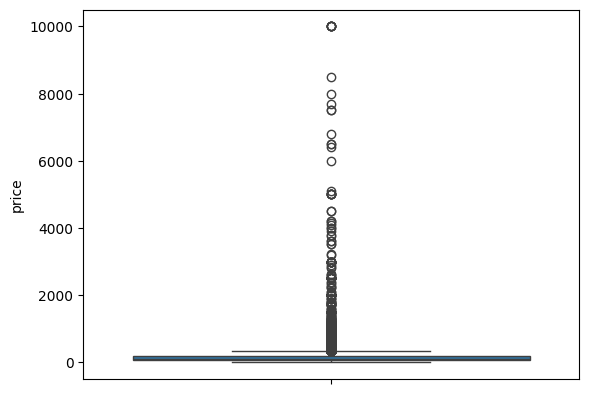

In [ ]:
sns.boxplot(df_copy['price'])

<Figure size 1000x600 with 0 Axes>

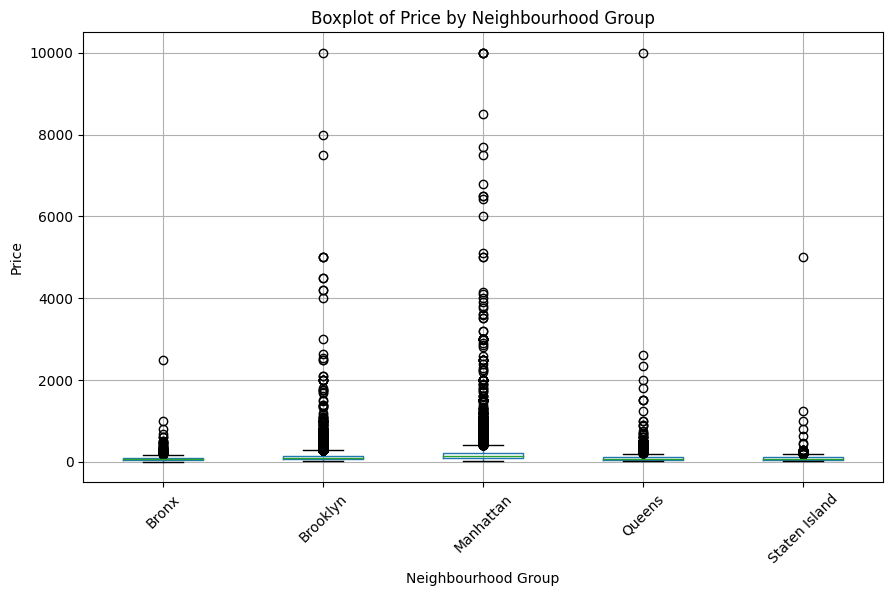

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
df_copy.boxplot(column='price', by='neighbourhood_group', figsize=(10,6))
plt.title('Boxplot of Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
df_copy[(df_copy.price>=10000)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaT,NaN,1,83


In [ ]:
#we are removing the outliers in the dataset
df_copy=df_copy[~(df_copy.price>=10000)]

In [ ]:
df_copy.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5206
reviews_per_month                 5206
calculated_host_listings_count       0
availability_365                     0
dtype: int64